Problem Statement: Can we Predict the likelihood of offence being prosecuted? Given the information related to crime such as type, time of year, location etc ? 

In [1]:
from glob import glob 
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion and Pre-Processing
Source: https://data.police.uk/data/

In [2]:
files = glob("D:/three years data/*/*outcomes.csv")
len(files)

36

In [3]:
df = pd.concat(map(pd.read_csv, files))
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged


In [4]:
df.shape

(229197, 10)

In [5]:
files_2 = glob("D:/three years data/*/*street.csv")
len(files_2)

36

In [6]:
df2 = pd.concat(map(pd.read_csv, files_2))
df2.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,325469efb7b9ccc2d8944ebf9d047a11ce68eb4513e0bf...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.920242,51.847189,On or near New Street,E01017720,Aylesbury Vale 008D,Violence and sexual offences,Status update unavailable,NaN
1,636d207693728586e204d0ccec5b444af3fce3c96724b5...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.572545,51.819252,On or near B4506,E01017701,Aylesbury Vale 009E,Vehicle crime,Status update unavailable,NaN
2,4aa892eebe7aef9d25a81faf55f60e891b7f85ef8ee2cd...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.605640,51.814065,On or near Stocks Road,E01017702,Aylesbury Vale 009F,Burglary,Investigation complete; no suspect identified,NaN
3,1bb603f80a5d05e0e853f205a3127951f300468788b2e5...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.579760,51.809439,On or near B4506,E01017702,Aylesbury Vale 009F,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,c836c30192da8516f9250be47fc02c2020f17dcafc6aee...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-1.007293,51.893136,On or near Prison,E01017674,Aylesbury Vale 010D,Other crime,Offender sent to prison,NaN


In [7]:
df2.shape

(315401, 12)

In [8]:
def merge_clean(df1, df2, key):
    
    df_merged = pd.merge(df1, df2, how="inner", on = key)
    
    for col in df_merged.columns:
        if col.endswith("_x"):
            df_merged.rename(columns = lambda col:col.rstrip("_x"), inplace = True)
        elif col.endswith("_y"):
            to_drop = [col for col in df_merged if col.endswith("_y")]
            df_merged.drop(to_drop, axis = 1, inplace = True)
        else:
            pass
    return df_merged

In [9]:
df_final = merge_clean(df, df2, "Crime ID")
df_final.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category,Context
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Public order,Unable to prosecute suspect,NaN
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified,NaN
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect,NaN
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning,Drugs,Offender given a drugs possession warning,NaN
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence,NaN


In [10]:
df_final.isna().sum()/(len(df_final))*100

Crime ID                   0.000000
Month                      0.000000
Reported by                0.000000
Falls within               0.000000
Longitude                  1.652705
Latitude                   1.652705
Location                   0.000000
LSOA code                  1.652705
LSOA name                  1.652705
Outcome type               0.000000
Crime type                 0.000000
Last outcome category      0.000000
Context                  100.000000
dtype: float64

In [11]:
df_final = df_final.drop(['Reported by', 'Falls within', 'Context'], axis=1)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Public order,Unable to prosecute suspect
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning,Drugs,Offender given a drugs possession warning
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
...,...,...,...,...,...,...,...,...,...,...
229195,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
229196,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
229197,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
229198,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [12]:
df_final = df_final.dropna()
df_final = df_final.reset_index(drop = True)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
1,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Offender given community sentence,Burglary,Offender given community sentence
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs,Offender given a caution
...,...,...,...,...,...,...,...,...,...,...
225407,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
225408,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225409,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225410,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [13]:
len(df_final["Crime ID"].unique())

209796

In [14]:
df_final = df_final.drop_duplicates(subset="Crime ID")
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs,Offender given a caution
5,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
225407,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
225408,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225409,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225410,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [15]:
len(df_final["Crime ID"].unique())

209796

In [16]:
df_final = df_final.drop(['Last outcome category','LSOA name','Location'], axis=1)
df_final = df_final.reset_index(drop = True)
df_final

,Crime ID,Month,Longitude,Latitude,LSOA code,Outcome type,Crime type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,E01023758,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,E01023926,Unable to prosecute suspect,Violence and sexual offences
2,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,E01023332,Investigation complete; no suspect identified,Burglary
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,E01033314,Offender given a caution,Drugs
4,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,E01023448,Investigation complete; no suspect identified,Burglary
...,...,...,...,...,...,...,...
209791,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,E01023920,Investigation complete; no suspect identified,Shoplifting
209792,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,E01023969,Investigation complete; no suspect identified,Other crime
209793,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,E01023359,Investigation complete; no suspect identified,Other crime
209794,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,E01023933,Investigation complete; no suspect identified,Violence and sexual offences


In [17]:
df_final.rename(inplace=True, columns={
    'Crime ID': 'crime_id',
    'Month': 'date',
    'LSOA code': 'LSOA_code',
    'Crime type': 'crime_type',
    'Outcome type': 'outcome_type'})

df_final.head()

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,E01023758,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,E01023926,Unable to prosecute suspect,Violence and sexual offences
2,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,E01023332,Investigation complete; no suspect identified,Burglary
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,E01033314,Offender given a caution,Drugs
4,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,E01023448,Investigation complete; no suspect identified,Burglary


In [18]:
df = df_final
del(df_final)

In [19]:
df["date"] = pd.to_datetime(df["date"])
df.head(2)

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,Unable to prosecute suspect,Violence and sexual offences


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209796 entries, 0 to 209795
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   crime_id      209796 non-null  object        
 1   date          209796 non-null  datetime64[ns]
 2   Longitude     209796 non-null  float64       
 3   Latitude      209796 non-null  float64       
 4   LSOA_code     209796 non-null  object        
 5   outcome_type  209796 non-null  object        
 6   crime_type    209796 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 11.2+ MB


### Exploratory Data Analysis and Feature Engineering 

In [21]:
def summary_col(df, col):
    
    #print(df[str(col)].unique())
    print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(y=col, data=df)

In [22]:
def summary_col_hue_outcome(df, col):
    
    #print(df[str(col)].unique())
    #print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=col, data=df, hue = "outcome_type")
    plt.xticks(rotation=45)

In [23]:
def summary_col_hue_crime(df, col):
    
    #print(df[str(col)].unique())
    #print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=col, data=df, hue = "crime_type")
    plt.xticks(rotation=45)

Unable to prosecute suspect                            91961
Investigation complete; no suspect identified          88436
Suspect charged                                        17299
Local resolution                                        4761
Offender given a caution                                3211
Action to be taken by another organisation              2094
Formal action is not in the public interest              753
Offender given a drugs possession warning                525
Further investigation is not in the public interest      411
Further action is not in the public interest             152
Offender given penalty notice                            112
Suspect charged as part of another case                   76
Defendant sent to Crown Court                              5
Name: outcome_type, dtype: int64


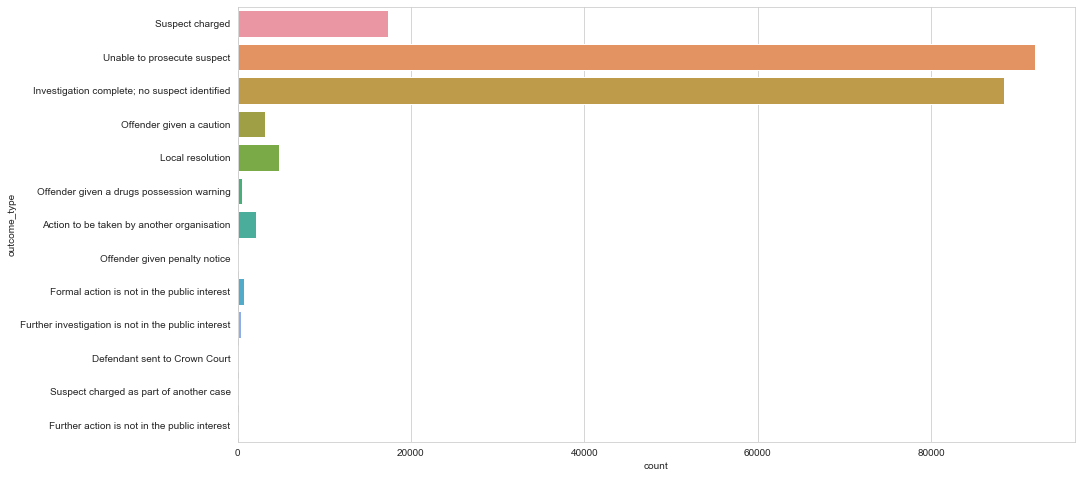

In [24]:
summary_col(df, "outcome_type")

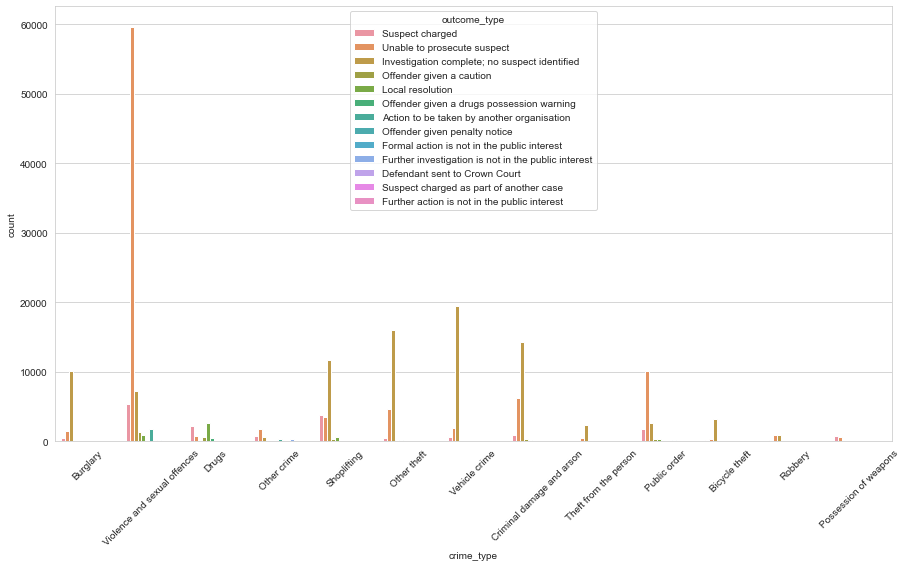

In [25]:
summary_col_hue_outcome(df, "crime_type")

In [26]:
df["crime_type"].unique()

array(['Burglary', 'Violence and sexual offences', 'Drugs', 'Other crime',
       'Shoplifting', 'Other theft', 'Vehicle crime',
       'Criminal damage and arson', 'Theft from the person',
       'Public order', 'Bicycle theft', 'Robbery',
       'Possession of weapons'], dtype=object)

Sources cited to classify crime

https://www.sentencingcouncil.org.uk/blog/post/what-is-the-difference-between-theft-robbery-and-burglary/#:~:text=Put%20very%20simply%2C%20someone%20is,to%20steal%20property%20from%20it.

In [27]:
df["crime_type"] = df["crime_type"].replace({"Other theft":"Theft", "Shoplifting":"Theft", 
"Bicycle theft": "Theft", "Theft from the person": "Theft"}, regex=True)
df.head(2)

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,Unable to prosecute suspect,Violence and sexual offences


In [28]:
df["crime_type"].unique()

array(['Burglary', 'Violence and sexual offences', 'Drugs', 'Other crime',
       'Theft', 'Vehicle crime', 'Criminal damage and arson',
       'Public order', 'Robbery', 'Possession of weapons'], dtype=object)

Sources to classify crime:

https://www.met.police.uk/foi-ai/metropolitan-police/disclosure-2019/july-2019/clarification-classification-cases/

https://www.cps.gov.uk/rasso-guide/how-we-make-decision-what-do-your-case-0

https://data.police.uk/docs/method/outcomes-for-crime/

https://data.police.uk/about/

https://www.police.uk/pu/about-police.uk-crime-data/

https://www.cps.gov.uk/publication/code-crown-prosecutors

In [29]:
df["outcome_type"] = df["outcome_type"].replace({"Suspect charged":"prosecuted", 
"Suspect charged as part of another case":"prosecuted", 
"Defendant sent to Crown Court": "prosecuted", "Action to be taken by another organisation": "prosecuted",
"Offender given a drugs possession warning" : "prosecuted", "Offender given penalty notice":"prosecuted",
"prosecuted as part of another case":"prosecuted",
"Offender given a caution":"prosecuted", "prosecuted as part of another case":"prosecuted"})
df.head(2)

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,prosecuted,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,Unable to prosecute suspect,Violence and sexual offences


In [30]:
df["outcome_type"].unique()

array(['prosecuted', 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Local resolution', 'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Further action is not in the public interest'], dtype=object)

In [31]:
df["outcome_type"] = df["outcome_type"].replace({"Unable to prosecute suspect":"not_prosecuted", 
"Local resolution":"not_prosecuted", 
"Formal action is not in the public interest": "not_prosecuted",
"Further action is not in the public interest" : "not_prosecuted"})
df.head(2)

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,prosecuted,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,not_prosecuted,Violence and sexual offences


In [32]:
df["outcome_type"].unique()

array(['prosecuted', 'not_prosecuted',
       'Investigation complete; no suspect identified',
       'Further investigation is not in the public interest'],
      dtype=object)

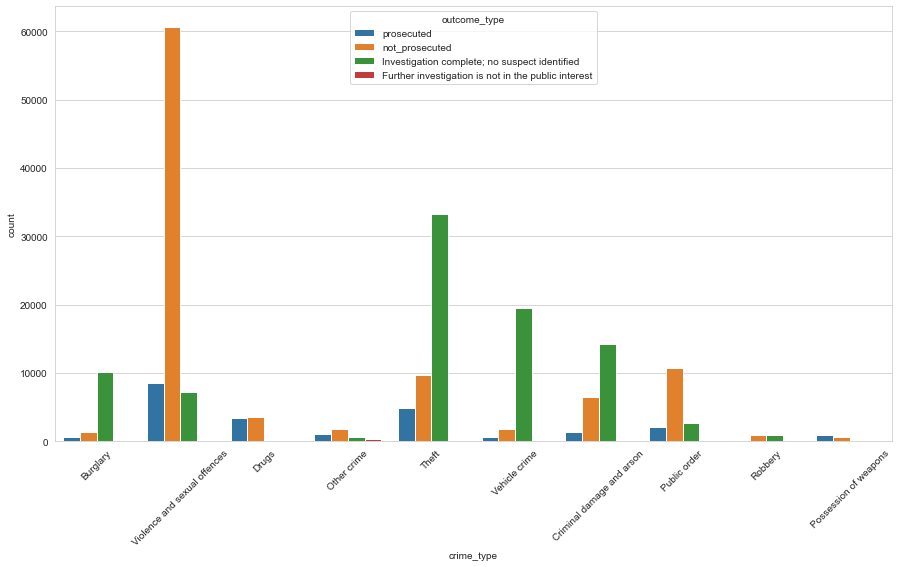

In [33]:
summary_col_hue_outcome(df, "crime_type")

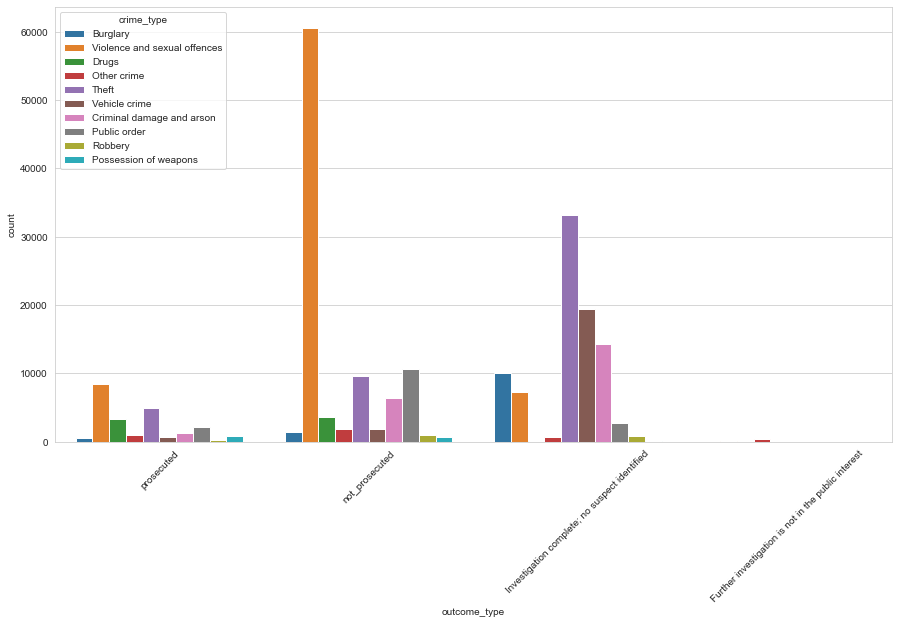

In [34]:
summary_col_hue_crime(df, "outcome_type")

In [35]:
df.drop(df.loc[df['outcome_type']=="Investigation complete; no suspect identified"].index, inplace=True)
df.drop(df.loc[df['outcome_type']=="Further investigation is not in the public interest"].index, inplace=True)
df

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,prosecuted,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,not_prosecuted,Violence and sexual offences
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03-01,-0.249644,51.762762,E01033314,prosecuted,Drugs
5,7e8c8555f429ce4d54d01587863f600c334ae128dc466b...,2019-03-01,-0.367482,51.708600,E01023733,not_prosecuted,Drugs
7,effa52207fd71066024163dada5a0687ae512f145155cd...,2019-03-01,-0.411727,51.707372,E01023804,not_prosecuted,Violence and sexual offences
...,...,...,...,...,...,...,...
209782,9626f6acfa4eb4f0a58386c51988aa1ca741c72f7e8548...,2022-02-01,-0.200649,51.900023,E01023758,not_prosecuted,Public order
209783,ae64848987fefecba8897f3c8fdcc196a0f89ad044a7bc...,2022-02-01,-0.563047,51.765698,E01023364,not_prosecuted,Violence and sexual offences
209785,0882a8445189a83c6550d3e4038344524477eb06575c7f...,2022-02-01,-0.430208,51.758416,E01023345,not_prosecuted,Theft
209788,60df1c9d64d8b08a770be91cbc4c052b18a2214f8f5034...,2022-02-01,-0.407564,51.644965,E01023865,not_prosecuted,Violence and sexual offences


In [36]:
df_map = df.iloc[:12000, :]
df_map

,crime_id,date,Longitude,Latitude,LSOA_code,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,E01023758,prosecuted,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,E01023926,not_prosecuted,Violence and sexual offences
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03-01,-0.249644,51.762762,E01033314,prosecuted,Drugs
5,7e8c8555f429ce4d54d01587863f600c334ae128dc466b...,2019-03-01,-0.367482,51.708600,E01023733,not_prosecuted,Drugs
7,effa52207fd71066024163dada5a0687ae512f145155cd...,2019-03-01,-0.411727,51.707372,E01023804,not_prosecuted,Violence and sexual offences
...,...,...,...,...,...,...,...
23497,1aa624525493d4c78044aafcc963a42d9451f22f077ea0...,2019-07-01,-0.587191,51.767070,E01023369,prosecuted,Public order
23498,a1468b64ce0a4224cc7a3414a5d09f5a3c14097f100723...,2019-07-01,-0.587191,51.767070,E01023369,prosecuted,Public order
23502,a8f04d4e20d1356191ec10b60898d449449294fc6b0600...,2019-07-01,-0.333880,51.717894,E01023720,prosecuted,Possession of weapons
23503,8249e2061c76590668e953bff78850ed4ac291e1dc5171...,2019-07-01,-0.394056,51.627616,E01023844,not_prosecuted,Violence and sexual offences


In [37]:
import folium
from folium import plugins
crime_locations = df_map[["Longitude", "Latitude", "outcome_type"]]
map = folium.Map(location=[crime_locations.Latitude.mean(), crime_locations.Longitude.mean()], zoom_start=14, control_scale=True)

In [38]:
map

In [39]:
# for index, location_info in crime_locations.iterrows():
#     folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["outcome_type"]).add_to(map)

In [40]:
heat_points = df_map[['Latitude', 'Longitude']].values

# plot heatmap
map.add_children(plugins.HeatMap(heat_points, radius=15))
map

C:\Users\saqui\AppData\Local\Temp/ipykernel_23732/2016975188.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  map.add_children(plugins.HeatMap(heat_points, radius=15))


In [41]:
df_burglary = df.loc[df['crime_type'] == "Burglary"]
df_sexual_violence = df.loc[df['crime_type'] == "Violence and sexual offences"]
df_drugs = df.loc[df['crime_type'] == "Drugs"]
df_theft = df.loc[df['crime_type'] == "Theft"]
df_public_order = df.loc[df['crime_type'] == "Public order"]
df_vehicle_crime = df.loc[df['crime_type'] == "Vehicle crime"]
df_arson = df.loc[df['crime_type'] == "Criminal damage and arson"]
df_robbery = df.loc[df['crime_type'] == "Robbery"]
df_other = df.loc[df['crime_type'] == "Other crime"]
df_weapon = df.loc[df['crime_type'] == 'Possession of weapons']

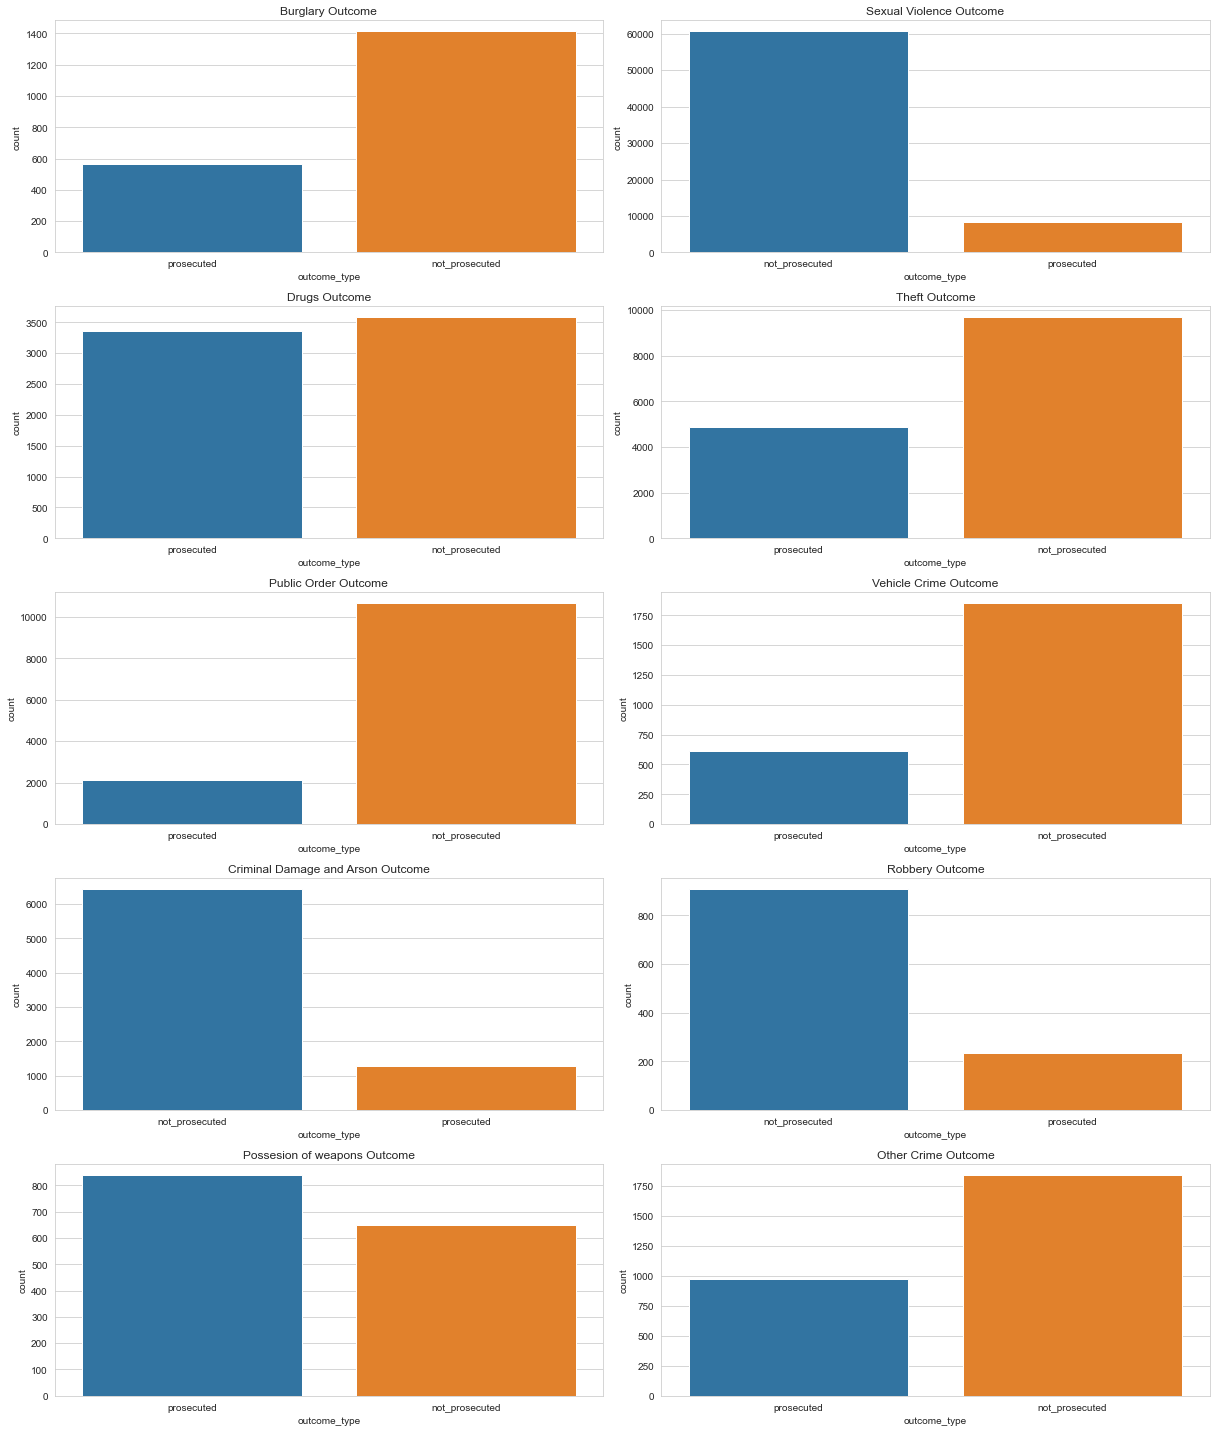

In [42]:
plt.rcParams['figure.figsize'] = [17, 20]

fig, _ = plt.subplots(5,2)

sns.countplot(x = "outcome_type", data=df_burglary,
ax=_[0][0])
_[0][0].set_title("Burglary Outcome")

sns.countplot(x = "outcome_type", data=df_sexual_violence,
ax=_[0][1])
_[0][1].set_title("Sexual Violence Outcome")

sns.countplot(x = "outcome_type", data=df_drugs,
ax=_[1][0])
_[1][0].set_title("Drugs Outcome")

sns.countplot(x = "outcome_type", data=df_theft,
ax=_[1][1])
_[1][1].set_title("Theft Outcome")

sns.countplot(x = "outcome_type", data=df_public_order,
ax=_[2][0])
_[2][0].set_title("Public Order Outcome")

sns.countplot(x = "outcome_type", data=df_vehicle_crime,
ax=_[2][1])
_[2][1].set_title("Vehicle Crime Outcome")

sns.countplot(x = "outcome_type", data=df_arson,
ax=_[3][0])
_[3][0].set_title("Criminal Damage and Arson Outcome")

sns.countplot(x = "outcome_type", data=df_robbery,
ax=_[3][1])
_[3][1].set_title("Robbery Outcome")

sns.countplot(x = "outcome_type", data=df_weapon,
ax=_[4][0])
_[4][0].set_title("Possesion of weapons Outcome")

sns.countplot(x = "outcome_type", data=df_other,
ax=_[4][1])
_[4][1].set_title("Other Crime Outcome")

plt.tight_layout()
plt.show()

In [43]:
heat_points = df_weapon[['Latitude', 'Longitude']].values

# plot heatmap
map.add_children(plugins.HeatMap(heat_points, radius=15))
map

C:\Users\saqui\AppData\Local\Temp/ipykernel_23732/310710728.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  map.add_children(plugins.HeatMap(heat_points, radius=15))


In [44]:
df.drop(["crime_id","Longitude", "Latitude"], axis=1, inplace=True)
df.head(1)

,date,LSOA_code,outcome_type,crime_type
0,2019-03-01,E01023758,prosecuted,Burglary


In [45]:
df.date.min(), df.date.max()

(Timestamp('2019-03-01 00:00:00'), Timestamp('2022-02-01 00:00:00'))

In [46]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month

    return year_month_extract

In [47]:
year_month_extract(df, "date")

<function __main__.year_month_extract(df, col)>

In [48]:
df.drop(["date"], axis=1, inplace=True)
df

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,E01023758,prosecuted,Burglary,2019,3
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3
3,E01033314,prosecuted,Drugs,2019,3
5,E01023733,not_prosecuted,Drugs,2019,3
7,E01023804,not_prosecuted,Violence and sexual offences,2019,3
...,...,...,...,...,...
209782,E01023758,not_prosecuted,Public order,2022,2
209783,E01023364,not_prosecuted,Violence and sexual offences,2022,2
209785,E01023345,not_prosecuted,Theft,2022,2
209788,E01023865,not_prosecuted,Violence and sexual offences,2022,2


In [49]:
df.reset_index(inplace=True)
df

,index,LSOA_code,outcome_type,crime_type,date_year,date_month
0,0,E01023758,prosecuted,Burglary,2019,3
1,1,E01023926,not_prosecuted,Violence and sexual offences,2019,3
2,3,E01033314,prosecuted,Drugs,2019,3
3,5,E01023733,not_prosecuted,Drugs,2019,3
4,7,E01023804,not_prosecuted,Violence and sexual offences,2019,3
...,...,...,...,...,...,...
120944,209782,E01023758,not_prosecuted,Public order,2022,2
120945,209783,E01023364,not_prosecuted,Violence and sexual offences,2022,2
120946,209785,E01023345,not_prosecuted,Theft,2022,2
120947,209788,E01023865,not_prosecuted,Violence and sexual offences,2022,2


In [50]:
df.drop(["index"], axis = 1, inplace=True)
df.head(2)

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,E01023758,prosecuted,Burglary,2019,3
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120949 entries, 0 to 120948
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   LSOA_code     120949 non-null  object
 1   outcome_type  120949 non-null  object
 2   crime_type    120949 non-null  object
 3   date_year     120949 non-null  int64 
 4   date_month    120949 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


Text(0.5, 0, 'month')

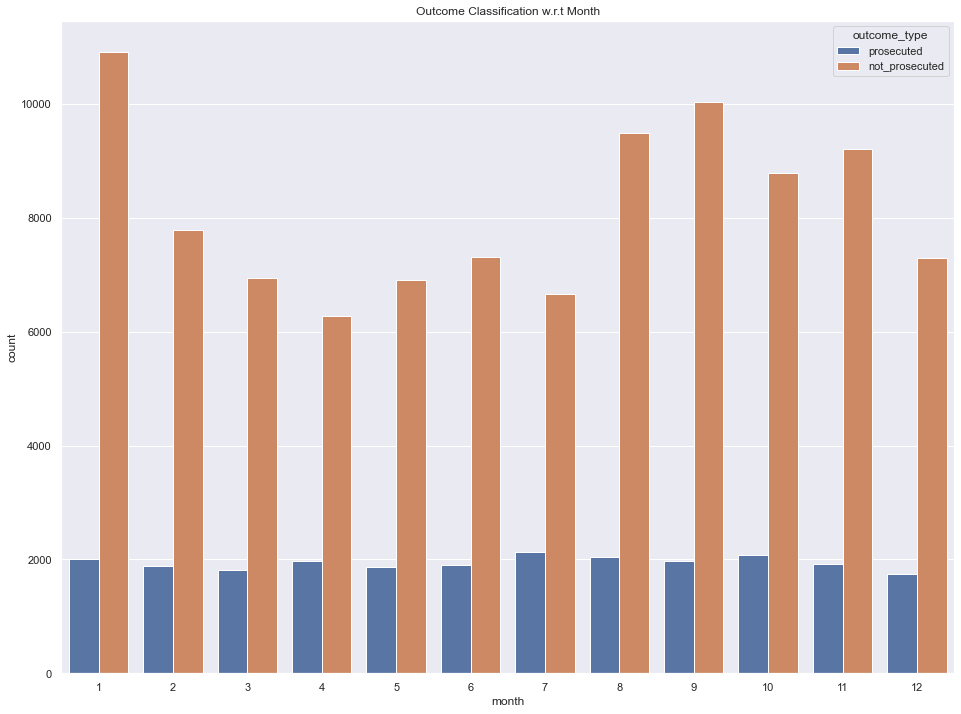

In [52]:
sns.set(rc={"figure.figsize":(16, 12)})
sns.countplot(data = df, x = "date_month", hue=df["outcome_type"])
plt.title("Outcome Classification w.r.t Month")
plt.xlabel("month")

Text(0.5, 0, 'month')

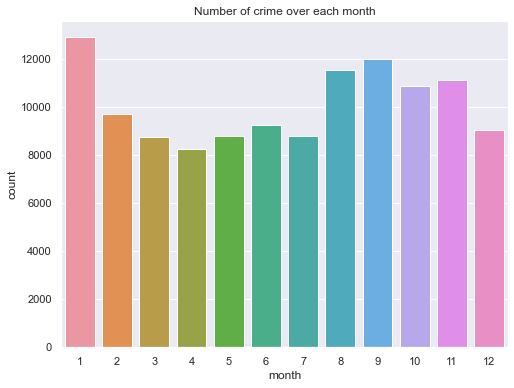

In [53]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.countplot(data = df, x = "date_month")
plt.title("Number of crime over each month")
plt.xlabel("month")

Text(0.5, 0, 'year')

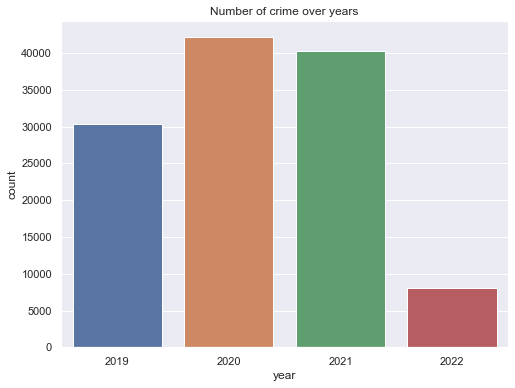

In [54]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.countplot(data = df, x = "date_year")
plt.title("Number of crime over years")
plt.xlabel("year")

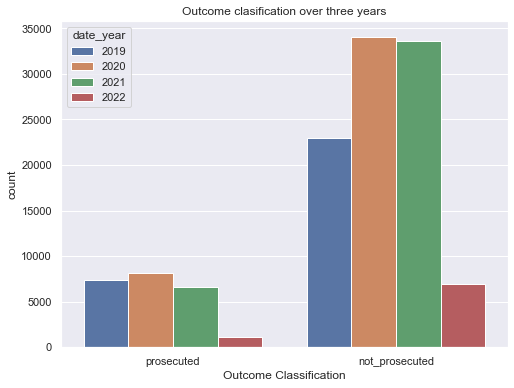

In [55]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.countplot(x = "outcome_type", data=df, hue=df["date_year"])
plt.title("Outcome clasification over three years")
plt.xlabel("Outcome Classification")
plt.show()

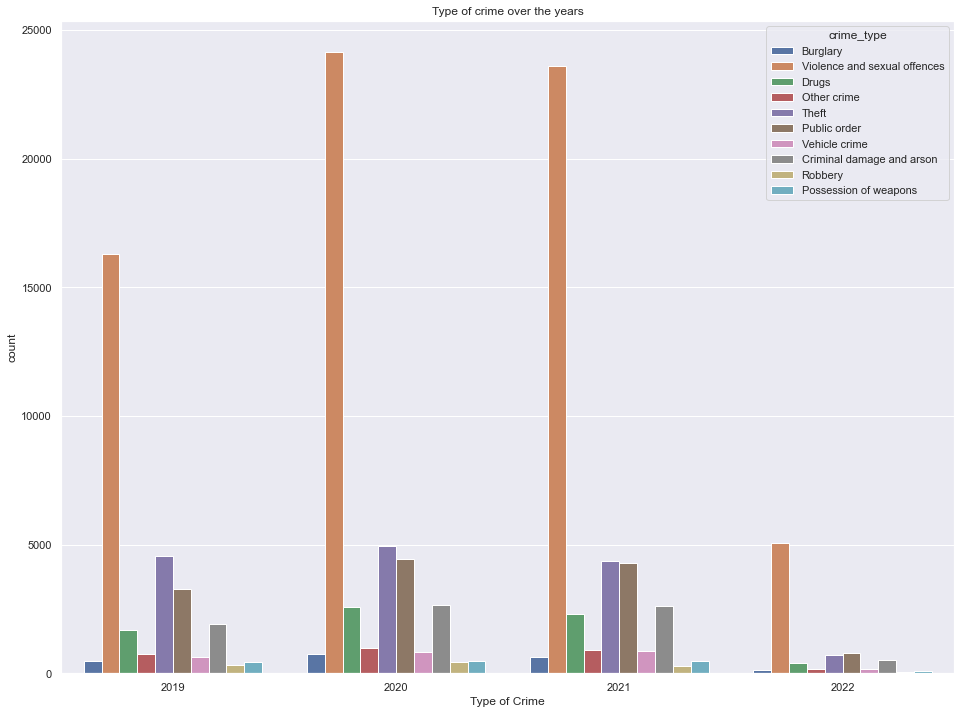

In [56]:
sns.set(rc={"figure.figsize":(16, 12)})
sns.countplot(x = "date_year", data=df, hue=df["crime_type"])
plt.title("Type of crime over the years")
plt.xlabel("Type of Crime")
plt.show()

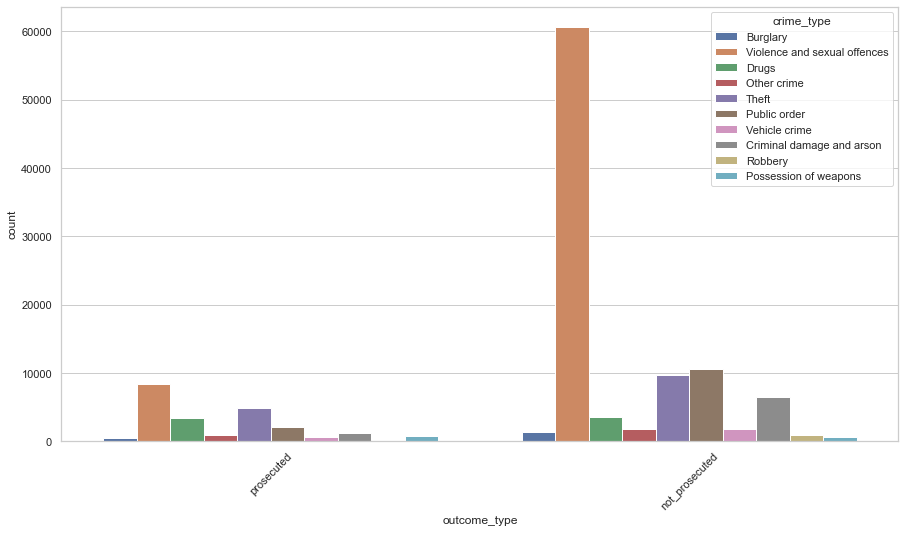

In [57]:
summary_col_hue_crime(df, "outcome_type")

not_prosecuted    97627
prosecuted        23322
Name: outcome_type, dtype: int64

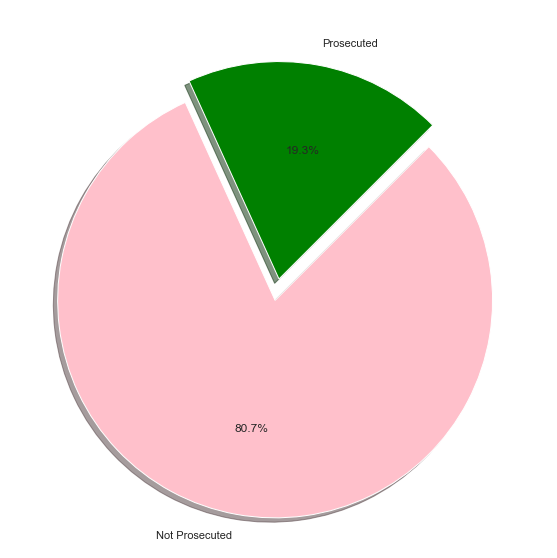

In [58]:
fig = plt.figure(figsize=(10,10))
colors = ["green",'pink']
prosec = df[df['outcome_type']=="prosecuted"]
not_prosec = df[df['outcome_type']=="not_prosecuted"]
ck = [prosec['outcome_type'].count(), not_prosec['outcome_type'].count()]
piechart = plt.pie(ck,labels=["Prosecuted","Not Prosecuted"],
autopct ='%1.1f%%',
shadow = True,
colors = colors,
startangle = 45,
explode=(0, 0.1))
df.outcome_type.value_counts()

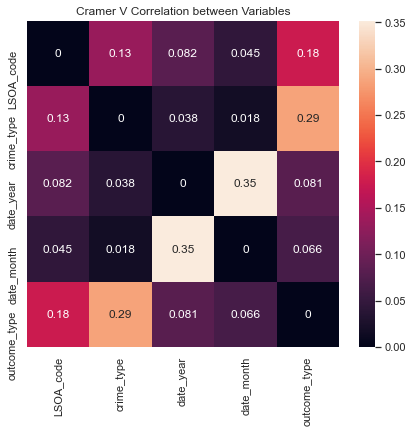

In [59]:
## Author Credit: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ["LSOA_code","crime_type","date_year", "date_month","outcome_type"]
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

### Train Test Split

In [60]:
df

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,E01023758,prosecuted,Burglary,2019,3
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3
2,E01033314,prosecuted,Drugs,2019,3
3,E01023733,not_prosecuted,Drugs,2019,3
4,E01023804,not_prosecuted,Violence and sexual offences,2019,3
...,...,...,...,...,...
120944,E01023758,not_prosecuted,Public order,2022,2
120945,E01023364,not_prosecuted,Violence and sexual offences,2022,2
120946,E01023345,not_prosecuted,Theft,2022,2
120947,E01023865,not_prosecuted,Violence and sexual offences,2022,2


In [61]:
df_outcome = df["outcome_type"]
df = pd.concat([df, df_outcome], axis=1)
df.head()

,LSOA_code,outcome_type,crime_type,date_year,date_month,outcome_type
0,E01023758,prosecuted,Burglary,2019,3,prosecuted
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3,not_prosecuted
2,E01033314,prosecuted,Drugs,2019,3,prosecuted
3,E01023733,not_prosecuted,Drugs,2019,3,not_prosecuted
4,E01023804,not_prosecuted,Violence and sexual offences,2019,3,not_prosecuted


In [62]:
df = df.loc[:,~df.T.duplicated(keep='last')]
df.head()

,LSOA_code,crime_type,date_year,date_month,outcome_type
0,E01023758,Burglary,2019,3,prosecuted
1,E01023926,Violence and sexual offences,2019,3,not_prosecuted
2,E01033314,Drugs,2019,3,prosecuted
3,E01023733,Drugs,2019,3,not_prosecuted
4,E01023804,Violence and sexual offences,2019,3,not_prosecuted


In [63]:
df.shape

(120949, 5)

In [64]:
x_input = df.iloc[: , :-1]
x_input

,LSOA_code,crime_type,date_year,date_month
0,E01023758,Burglary,2019,3
1,E01023926,Violence and sexual offences,2019,3
2,E01033314,Drugs,2019,3
3,E01023733,Drugs,2019,3
4,E01023804,Violence and sexual offences,2019,3
...,...,...,...,...
120944,E01023758,Public order,2022,2
120945,E01023364,Violence and sexual offences,2022,2
120946,E01023345,Theft,2022,2
120947,E01023865,Violence and sexual offences,2022,2


In [65]:
y = df["outcome_type"]
y

0             prosecuted
1         not_prosecuted
2             prosecuted
3         not_prosecuted
4         not_prosecuted
               ...      
120944    not_prosecuted
120945    not_prosecuted
120946    not_prosecuted
120947    not_prosecuted
120948    not_prosecuted
Name: outcome_type, Length: 120949, dtype: object

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [67]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,LSOA_code,crime_type,date_year,date_month,outcome_type
98966,E01023870,Violence and sexual offences,2021,9,not_prosecuted
69006,E01023594,Possession of weapons,2020,11,prosecuted
18159,E01023513,Violence and sexual offences,2019,9,prosecuted
19206,E01023727,Violence and sexual offences,2019,9,not_prosecuted
100760,E01023656,Violence and sexual offences,2021,9,not_prosecuted


In [68]:
df_test = pd.concat([x_test, y_test], axis=1)
df_test.head()

,LSOA_code,crime_type,date_year,date_month,outcome_type
29440,E01023379,Public order,2019,12,not_prosecuted
79372,E01023320,Criminal damage and arson,2021,2,not_prosecuted
69653,E01023298,Theft,2020,12,not_prosecuted
109292,E01023800,Violence and sexual offences,2021,11,not_prosecuted
20802,E01023758,Drugs,2019,10,prosecuted


In [69]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [70]:
df_train["outcome_type"] = lb_encode.fit_transform(df_train["outcome_type"])
df_train

,LSOA_code,crime_type,date_year,date_month,outcome_type
98966,E01023870,Violence and sexual offences,2021,9,0
69006,E01023594,Possession of weapons,2020,11,1
18159,E01023513,Violence and sexual offences,2019,9,1
19206,E01023727,Violence and sexual offences,2019,9,0
100760,E01023656,Violence and sexual offences,2021,9,0
...,...,...,...,...,...
76003,E01023669,Violence and sexual offences,2021,1,0
89696,E01023346,Robbery,2021,6,0
43271,E01023449,Public order,2020,4,0
84710,E01023303,Theft,2021,4,0


In [ ]:
lb_encode.classes_

array(['not_prosecuted', 'prosecuted'], dtype=object)

In [71]:
df_test["outcome_type"] = lb_encode.transform(df_test["outcome_type"])
df_test

,LSOA_code,crime_type,date_year,date_month,outcome_type
29440,E01023379,Public order,2019,12,0
79372,E01023320,Criminal damage and arson,2021,2,0
69653,E01023298,Theft,2020,12,0
109292,E01023800,Violence and sexual offences,2021,11,0
20802,E01023758,Drugs,2019,10,1
...,...,...,...,...,...
13864,E01023789,Violence and sexual offences,2019,8,0
69464,E01023512,Violence and sexual offences,2020,12,0
33464,E01023775,Criminal damage and arson,2020,1,0
46702,E01023302,Violence and sexual offences,2020,5,0


In [72]:
dummy_year = pd.get_dummies(df_train["date_year"], prefix="crime_year")
dummy_month = pd.get_dummies(df_train["date_month"], prefix="crime_month")
dummy_crime_type = pd.get_dummies(df_train["crime_type"], prefix="crime_type")

In [73]:
df_train = pd.concat([df_train, dummy_year, dummy_month, dummy_crime_type], axis=1)
df_train.head()

,LSOA_code,crime_type,date_year,date_month,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
98966,E01023870,Violence and sexual offences,2021,9,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
69006,E01023594,Possession of weapons,2020,11,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18159,E01023513,Violence and sexual offences,2019,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19206,E01023727,Violence and sexual offences,2019,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100760,E01023656,Violence and sexual offences,2021,9,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
df_train.drop(["crime_type", "date_year", "date_month"], axis=1, inplace=True)

In [75]:
df_train

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
98966,E01023870,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69006,E01023594,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18159,E01023513,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19206,E01023727,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100760,E01023656,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76003,E01023669,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89696,E01023346,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
43271,E01023449,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
84710,E01023303,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [76]:
df_train.groupby(['LSOA_code'])['outcome_type'].mean()

LSOA_code
E01000015    0.0
E01000022    1.0
E01000027    1.0
E01000040    0.0
E01000043    1.0
            ... 
W01000941    0.0
W01000959    0.0
W01000960    0.0
W01001061    1.0
W01001405    0.0
Name: outcome_type, Length: 1117, dtype: float64

In [77]:
mean_encoded = df_train.groupby(['LSOA_code'])['outcome_type'].mean().to_dict()
mean_encoded

{'E01000015': 0.0,
 'E01000022': 1.0,
 'E01000027': 1.0,
 'E01000040': 0.0,
 'E01000043': 1.0,
 'E01000045': 0.0,
 'E01000092': 1.0,
 'E01000094': 1.0,
 'E01000130': 0.0,
 'E01000145': 0.0,
 'E01000151': 0.0,
 'E01000159': 1.0,
 'E01000164': 0.0,
 'E01000185': 0.0,
 'E01000187': 1.0,
 'E01000194': 1.0,
 'E01000195': 0.0,
 'E01000196': 1.0,
 'E01000216': 0.0,
 'E01000223': 0.0,
 'E01000225': 0.0,
 'E01000226': 1.0,
 'E01000229': 1.0,
 'E01000233': 1.0,
 'E01000234': 0.0,
 'E01000243': 0.0,
 'E01000244': 1.0,
 'E01000249': 0.6666666666666666,
 'E01000252': 0.0,
 'E01000253': 0.3,
 'E01000254': 1.0,
 'E01000263': 0.0,
 'E01000268': 1.0,
 'E01000274': 1.0,
 'E01000285': 0.0,
 'E01000286': 0.0,
 'E01000287': 0.0,
 'E01000288': 0.0,
 'E01000289': 0.5,
 'E01000290': 0.4,
 'E01000292': 0.0,
 'E01000294': 0.8,
 'E01000306': 0.0,
 'E01000310': 0.0,
 'E01000315': 0.0,
 'E01000378': 0.0,
 'E01000478': 0.0,
 'E01000501': 0.0,
 'E01000517': 0.0,
 'E01000536': 0.0,
 'E01000551': 0.0,
 'E01000568': 0.

In [78]:
df_train['LSOA_code'] =  df_train['LSOA_code'].map(mean_encoded)
df_train.head

<bound method NDFrame.head of         LSOA_code  outcome_type  crime_year_2019  crime_year_2020  \
98966    0.132948             0                0                0   
69006    0.176471             1                0                1   
18159    0.137255             1                1                0   
19206    0.370253             0                1                0   
100760   0.242424             0                0                0   
...           ...           ...              ...              ...   
76003    0.150485             0                0                0   
89696    0.242820             0                0                0   
43271    0.309701             0                0                1   
84710    0.256757             0                0                0   
113452   0.171717             0                0                0   

        crime_year_2021  crime_year_2022  crime_month_1  crime_month_2  \
98966                 1                0              0            

In [79]:
df_train

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
98966,0.132948,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69006,0.176471,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18159,0.137255,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19206,0.370253,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100760,0.242424,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76003,0.150485,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89696,0.242820,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
43271,0.309701,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
84710,0.256757,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_outcome = df_train["outcome_type"]
df_train = pd.concat([df_train, df_outcome], axis=1)
df_train.head()

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
98966,0.132948,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
69006,0.176471,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18159,0.137255,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19206,0.370253,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100760,0.242424,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
df_train = df_train.loc[:,~df_train.T.duplicated(keep='last')]
df_train.head()

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
98966,0.132948,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
69006,0.176471,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18159,0.137255,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19206,0.370253,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100760,0.242424,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Test Data

In [82]:
df_test

,LSOA_code,crime_type,date_year,date_month,outcome_type
29440,E01023379,Public order,2019,12,0
79372,E01023320,Criminal damage and arson,2021,2,0
69653,E01023298,Theft,2020,12,0
109292,E01023800,Violence and sexual offences,2021,11,0
20802,E01023758,Drugs,2019,10,1
...,...,...,...,...,...
13864,E01023789,Violence and sexual offences,2019,8,0
69464,E01023512,Violence and sexual offences,2020,12,0
33464,E01023775,Criminal damage and arson,2020,1,0
46702,E01023302,Violence and sexual offences,2020,5,0


In [83]:
dummy_year = pd.get_dummies(df_test["date_year"], prefix="crime_year")
dummy_month = pd.get_dummies(df_test["date_month"], prefix="crime_month")
dummy_crime_type = pd.get_dummies(df_test["crime_type"], prefix="crime_type")

In [84]:
df_test = pd.concat([df_test, dummy_year, dummy_month, dummy_crime_type], axis=1)
df_test.head()

,LSOA_code,crime_type,date_year,date_month,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
29440,E01023379,Public order,2019,12,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79372,E01023320,Criminal damage and arson,2021,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
69653,E01023298,Theft,2020,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109292,E01023800,Violence and sexual offences,2021,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
20802,E01023758,Drugs,2019,10,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
df_test.drop(["crime_type", "date_year", "date_month"], axis=1, inplace=True)

In [86]:
df_test

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
29440,E01023379,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79372,E01023320,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
69653,E01023298,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109292,E01023800,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20802,E01023758,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13864,E01023789,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69464,E01023512,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33464,E01023775,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46702,E01023302,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
df_test.groupby(['LSOA_code'])['outcome_type'].mean()

LSOA_code
E01000151    0.500000
E01000231    1.000000
E01000235    0.000000
E01000253    0.000000
E01000286    1.000000
               ...   
E01033310    0.257143
E01033311    0.203390
E01033313    0.000000
E01033314    0.057143
E01033609    0.129032
Name: outcome_type, Length: 799, dtype: float64

In [88]:
mean_encoded = df_test.groupby(['LSOA_code'])['outcome_type'].mean().to_dict()
mean_encoded

{'E01000151': 0.5,
 'E01000231': 1.0,
 'E01000235': 0.0,
 'E01000253': 0.0,
 'E01000286': 1.0,
 'E01000289': 1.0,
 'E01000290': 0.0,
 'E01000294': 1.0,
 'E01000501': 0.0,
 'E01000563': 0.0,
 'E01000626': 0.0,
 'E01001069': 1.0,
 'E01001247': 0.0,
 'E01001259': 0.0,
 'E01001277': 0.0,
 'E01001337': 0.0,
 'E01001387': 0.0,
 'E01001407': 1.0,
 'E01001410': 0.0,
 'E01001414': 0.0,
 'E01001445': 1.0,
 'E01001479': 0.0,
 'E01001528': 1.0,
 'E01001539': 0.0,
 'E01001552': 0.375,
 'E01001687': 1.0,
 'E01001969': 1.0,
 'E01002132': 0.0,
 'E01002209': 0.0,
 'E01002211': 1.0,
 'E01002212': 0.0,
 'E01002214': 0.0,
 'E01002217': 0.0,
 'E01002225': 0.0,
 'E01002282': 1.0,
 'E01002311': 0.0,
 'E01002438': 0.0,
 'E01002474': 0.0,
 'E01002798': 1.0,
 'E01003283': 0.0,
 'E01003353': 0.0,
 'E01004072': 0.0,
 'E01004250': 1.0,
 'E01004284': 0.0,
 'E01007747': 0.0,
 'E01013207': 0.0,
 'E01013845': 0.0,
 'E01013967': 0.0,
 'E01015597': 1.0,
 'E01015710': 1.0,
 'E01015738': 0.0,
 'E01015760': 0.0,
 'E0101579

In [89]:
df_test['LSOA_code'] =  df_test['LSOA_code'].map(mean_encoded)
  
df_test.head

<bound method NDFrame.head of         LSOA_code  outcome_type  crime_year_2019  crime_year_2020  \
29440    0.235294             0                1                0   
79372    0.231579             0                0                0   
69653    0.111111             0                0                1   
109292   0.155779             0                0                0   
20802    0.336134             1                1                0   
...           ...           ...              ...              ...   
13864    0.200000             0                1                0   
69464    0.078947             0                0                1   
33464    0.262069             0                0                1   
46702    0.113636             0                0                1   
101814   0.262069             0                0                0   

        crime_year_2021  crime_year_2022  crime_month_1  crime_month_2  \
29440                 0                0              0            

In [90]:
df_test

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
29440,0.235294,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79372,0.231579,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
69653,0.111111,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109292,0.155779,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20802,0.336134,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13864,0.200000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69464,0.078947,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33464,0.262069,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46702,0.113636,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df_outcome = df_test["outcome_type"]
df_test = pd.concat([df_test, df_outcome], axis=1)
df_test.head()

,LSOA_code,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
29440,0.235294,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79372,0.231579,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
69653,0.111111,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
109292,0.155779,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20802,0.336134,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [92]:
df_test = df_test.loc[:,~df_test.T.duplicated(keep='last')]
df_test.head()

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
29440,0.235294,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79372,0.231579,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69653,0.111111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
109292,0.155779,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20802,0.336134,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [93]:
df_train.reset_index(inplace=True)
df_train.drop(["index"], axis = 1, inplace=True)
df_train.head(2)

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.132948,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.176471,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [94]:
df_test.reset_index(inplace=True)
df_test.drop(["index"], axis = 1, inplace=True)
df_test.head(2)

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Other crime,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.235294,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.231579,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
# Dropping column to mitigate dummy variable trap
df_train.drop(["crime_year_2022","crime_month_12","crime_type_Other crime"], axis = 1, inplace = True)
df_test.drop(["crime_year_2022","crime_month_12","crime_type_Other crime"], axis = 1, inplace = True)

In [95]:
#df_train.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/train_final-one-hot-mean-encoded.csv", index=False)

In [96]:
#df_test.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/test_final-one-hot-mean-encoded.csv", index=False)

In [ ]:
#df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-mean-encoded.csv", index=False)

In [ ]:
#df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv", index=False)

In [ ]:
#df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv", index=False)